# Agriculture-ML-Project

## DataSet link-https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/test_agriculture.xlsx
   
## DataSet link- https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/train_agriculture.xlsx

In [1]:
## importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## loading the dataset

In [2]:
## loading the dataset :
train=pd.read_excel('train_agriculture.xlsx')
test=pd.read_excel('test_agriculture.xlsx')

In [3]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
## now let us combained the two dataset :
data=pd.concat([train,test],ignore_index=True)

## EDA Proces

In [6]:
## lets check the final dataset with first five records :
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


In [7]:
## lets check the column names :
data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [8]:
## checking the datatypes :
data.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [9]:
## total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 453.1+ KB


## Checking the null values

In [10]:
## checking the null values :
data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [11]:
data['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65.])

In [12]:
data['Number_Weeks_Used']=data.fillna(data['Number_Weeks_Used'].mean())

In [13]:
data['Crop_Damage']=data.fillna(data['Crop_Damage'].mean())

In [14]:
data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

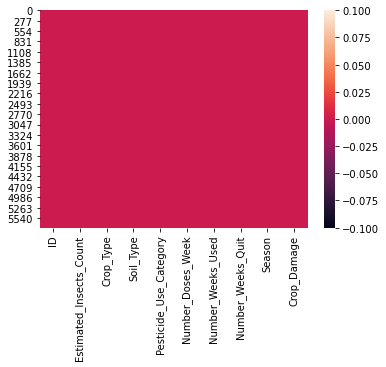

In [15]:
## checking the null values through heatmap :
sns.heatmap(data.isnull())

In [16]:
## lets check the column names :
data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

## Univariate/Biavariate Analysis

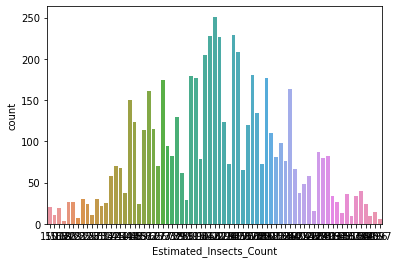

In [17]:
sns.countplot(x='Estimated_Insects_Count',data=data)

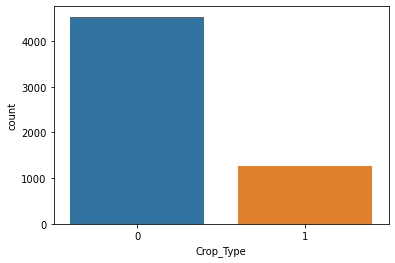

In [18]:
sns.countplot(x='Crop_Type',data=data)

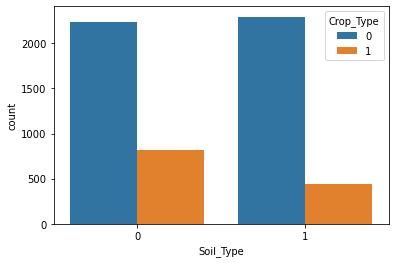

In [19]:
sns.countplot(x='Soil_Type',hue='Crop_Type',data=data)

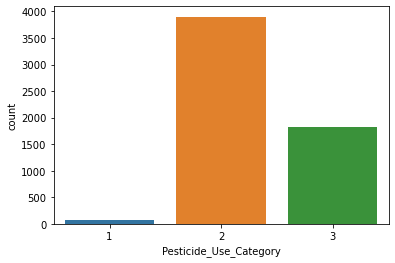

In [20]:
sns.countplot(data['Pesticide_Use_Category'])

## Stastistical Analysis

In [21]:
data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,8.760262,1.891687
std,821.330403,0.413280,0.499271,0.484594,15.655508,9.582781,0.692997
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,0.000000,1.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,6.000000,2.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,15.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,47.000000,3.000000


## Correlation Matrix

In [22]:
dfr=data.corr()
dfr

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.228822,-0.002287
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,-0.290973,0.003754
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.062686,-0.005204
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,-0.574041,0.009279
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,-0.024209,0.002751
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,1.000000,0.010324
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,0.010324,1.000000


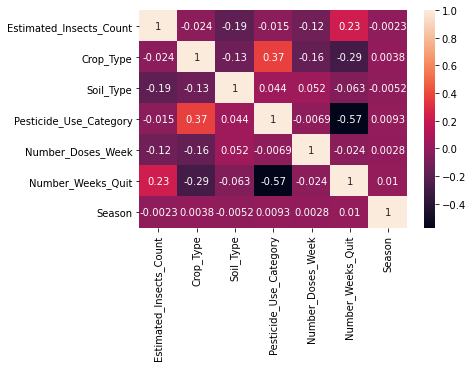

In [23]:
## correlation with the helpof heatmap :
sns.heatmap(dfr,annot=True)

In [24]:
## we will drop the ID of the crops :
data.drop('ID',axis=1,inplace=True)

In [25]:
## lets check the unique values :
data['Number_Weeks_Used'].unique()

array(['F00000001', 'F00000003', 'F00000004', ..., 'F00003138',
       'F00003149', 'F00003150'], dtype=object)

In [26]:
data['Crop_Damage'].unique()

array(['F00000001', 'F00000003', 'F00000004', ..., 'F00003138',
       'F00003149', 'F00003150'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
data['Crop_Damage']=le.fit_transform(data['Crop_Damage'])

In [29]:
data['Number_Weeks_Used']=le.fit_transform(data['Number_Weeks_Used'])

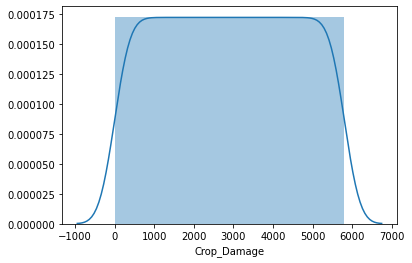

In [30]:
sns.distplot(data['Crop_Damage'])

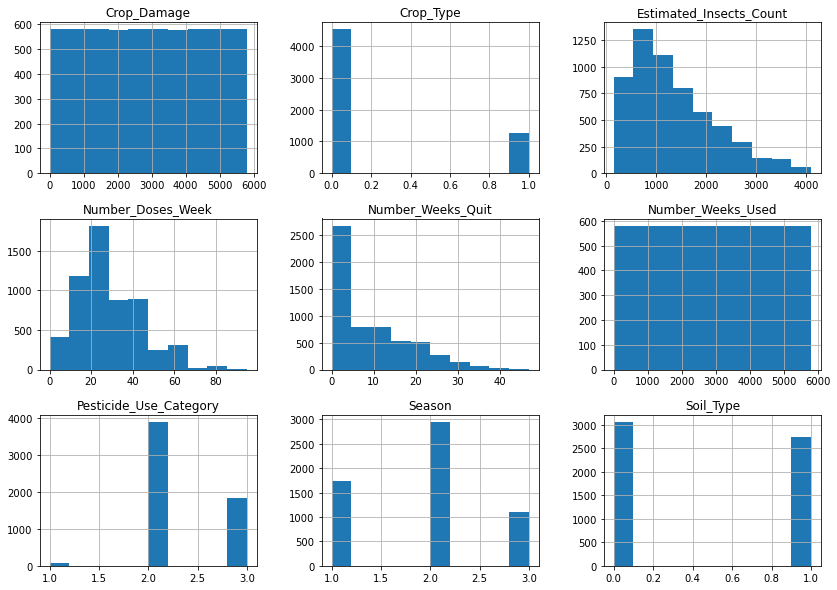

In [31]:
data.hist(figsize=(14,10))
plt.show()

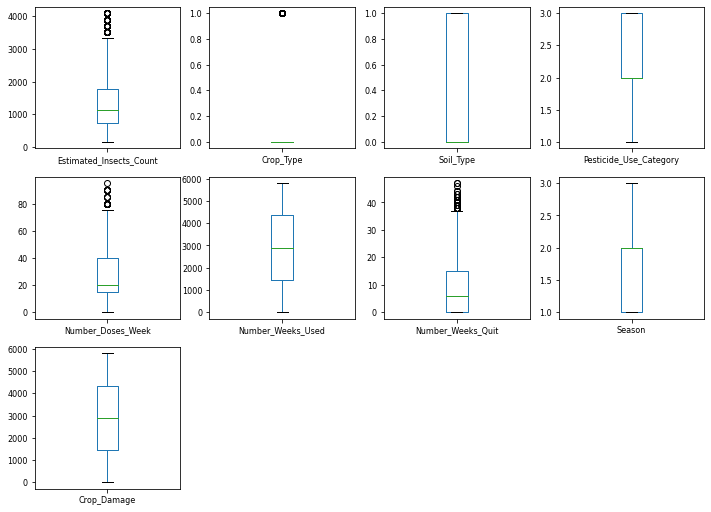

In [32]:
## box plot representaion for checking outliers :
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [33]:
data['Crop_Damage'].value_counts()

2047    1
4731    1
637     1
4735    1
2688    1
       ..
3339    1
5388    1
1294    1
3343    1
0       1
Name: Crop_Damage, Length: 5798, dtype: int64

## Splitting the dataset

In [34]:
## spliting the data into X and Y (input and output) :
X=data.drop('Crop_Damage',axis=1)
y=data['Crop_Damage']

In [35]:
## Scaling the dataset :
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [36]:
## let us split the data into train_test_split form sklearn :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [37]:
## model selection :
from sklearn import linear_model ## importing required libraries from skit-learn :
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring='r2').mean()

1.0

# LinearRegression

In [38]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train,y_train)
predm=lr.predict(X_test)
predm

array([4933., 1866., 1371., ..., 1037., 5257., 5608.])

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predm))
print('MSE:', metrics.mean_squared_error(y_test, predm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predm)))

MAE: 6.556609661331471e-13
MSE: 5.866027822111529e-25
RMSE: 7.658999818586973e-13


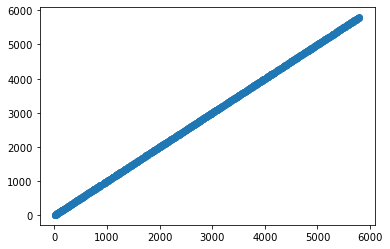

In [40]:
plt.scatter(x=y_test,y=predm)

# DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.6051724137931034
MSE: 3.886206896551724
RMSE: 1.9713464679126609


Text(0, 0.5, 'Predicted-Y')

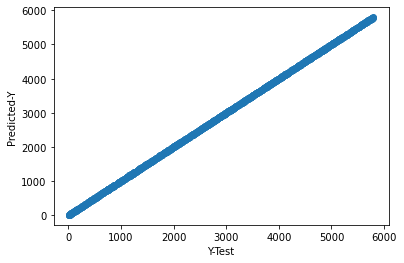

In [43]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y-Test')
plt.ylabel('Predicted-Y')

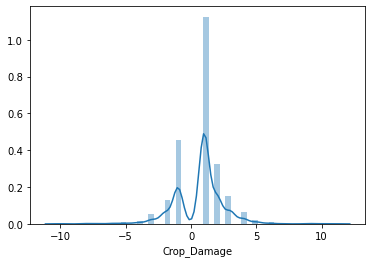

In [44]:
sns.distplot((y_test-pred),bins=50)

# RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr=DecisionTreeRegressor()
rfr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.6051724137931034
MSE: 3.886206896551724
RMSE: 1.9713464679126609


Text(0, 0.5, 'Predicted-Y')

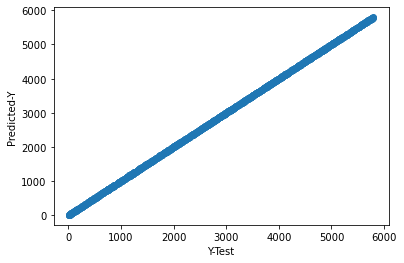

In [47]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y-Test')
plt.ylabel('Predicted-Y')

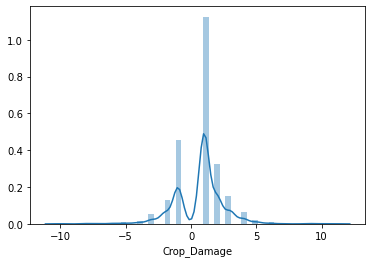

In [48]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
3734,4933,4932.0
1103,1866,1865.0
812,1371,1369.0
1632,2729,2728.0
1128,1900,1898.0


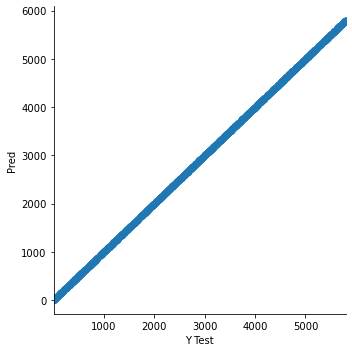

In [49]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Conclusion-We will go with decisionTreeRegressor. As it has very less RMSE.

In [50]:
## saving the model :
import joblib
joblib.dump(dtr,'Agriculture.pkl')

['Agriculture.pkl']